In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.metrics import balanced_accuracy_score, confusion_matrix, accuracy_score
from imblearn.metrics import classification_report_imbalanced

# import imcome data
df_income = pd.read_csv("../Data/income_evaluation_cleaned.csv")
df_income.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


### Data preprocessing

In [2]:
# Datatype in each column.
df_income.dtypes

age                int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
hours-per-week     int64
native-country    object
income            object
dtype: object

In [3]:
# The number of unique values in each column.
df_income.nunique()

age               72
workclass          7
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
hours-per-week    94
native-country    41
income             2
dtype: int64

In [4]:
# Generate categorical variable lists
income_cat = ['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_income[income_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(income_cat)
encode_df.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Merge one-hot encoded features and drop the originals
df_income = df_income.merge(encode_df, left_index=True, right_index=True).drop(income_cat,1)
df_income.head()

,age,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,40,<=50K,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,13,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,40,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,40,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,40,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data scaling

In [6]:
# Split our preprocessed data into our features and target arrays
X = df_income.drop(columns='income')
y = df_income['income']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### SVM

In [7]:
# Instantiate a linear SVM model
from sklearn.svm import SVC
model = SVC(kernel='linear')

# Fit the data
model.fit(X_train_scaled, y_train)

# Make predictions using the test data
y_pred = model.predict(X_test_scaled)
results = pd.DataFrame({
    "Prediction": y_pred, 
    "Actual": y_test
}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,<=50K,>50K
1,<=50K,<=50K
2,<=50K,<=50K
3,<=50K,>50K
4,>50K,>50K


In [8]:
# Calculate the Balanced Accuracy Score
print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_test, y_pred)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
cm_df = pd.DataFrame(
    cm, index=["Actual Income <=50K","Actual Income >50K"], columns=['Predicted Income <=50K','Predicted Income >50K'])
cm_df

Balanced Accuracy Score: 0.7478534477464305
Accuracy Score: 0.8372894841532953


,Predicted Income <=50K,Predicted Income >50K
Actual Income <=50K,5236,406
Actual Income >50K,821,1078


In [9]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

      <=50K       0.86      0.93      0.57      0.90      0.73      0.55      5642
       >50K       0.73      0.57      0.93      0.64      0.73      0.51      1899

avg / total       0.83      0.84      0.66      0.83      0.73      0.54      7541



### Logistic Regression Model

In [10]:
# Train the Logistic Regression model 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [11]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_pred)

0.7534661613166429

In [12]:
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

0.8396764354860098


In [13]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[5231,  411],
       [ 798, 1101]], dtype=int64)

In [14]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

      <=50K       0.87      0.93      0.58      0.90      0.73      0.56      5642
       >50K       0.73      0.58      0.93      0.65      0.73      0.52      1899

avg / total       0.83      0.84      0.67      0.83      0.73      0.55      7541



### RandomForest

In [15]:
# Creating a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100,random_state=1) 
rf_model = rf_model.fit(X_train_scaled, y_train)
predictions = rf_model.predict(X_test_scaled)

In [16]:
# Calculated the balanced accuracy score
acc_score = balanced_accuracy_score(y_test, predictions)
print(acc_score)

0.7400920818976162


In [17]:
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

0.8204482164169208


In [18]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[5089  553]
 [ 801 1098]]


In [19]:
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

      <=50K       0.86      0.90      0.58      0.88      0.72      0.54      5642
       >50K       0.67      0.58      0.90      0.62      0.72      0.50      1899

avg / total       0.81      0.82      0.66      0.82      0.72      0.53      7541



In [20]:
# List the features sorted in descending order by feature importance
importances = rf_model.feature_importances_

sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.28958804437217794, 'age'),
 (0.13703860247038777, 'hours-per-week'),
 (0.0746088597246346, 'marital-status_ Married-civ-spouse'),
 (0.042657239518429015, 'relationship_ Husband'),
 (0.02748139092962657, 'education_ Bachelors'),
 (0.027043406376525067, 'marital-status_ Never-married'),
 (0.024488950750854697, 'occupation_ Prof-specialty'),
 (0.024327131984544552, 'occupation_ Exec-managerial'),
 (0.017381922203034656, 'education_ Masters'),
 (0.015479093894941842, 'education_ HS-grad'),
 (0.014502314145169044, 'workclass_ Private'),
 (0.012902697514654813, 'relationship_ Not-in-family'),
 (0.011649385546981474, 'education_ Some-college'),
 (0.011371966611383526, 'workclass_ Self-emp-not-inc'),
 (0.011306701379998734, 'sex_ Female'),
 (0.011249259442535462, 'relationship_ Own-child'),
 (0.011027732023876049, 'relationship_ Wife'),
 (0.010718257058290968, 'education_ Prof-school'),
 (0.010689122364633208, 'sex_ Male'),
 (0.01039363951152971, 'occupation_ Other-service'),
 (0.009358279

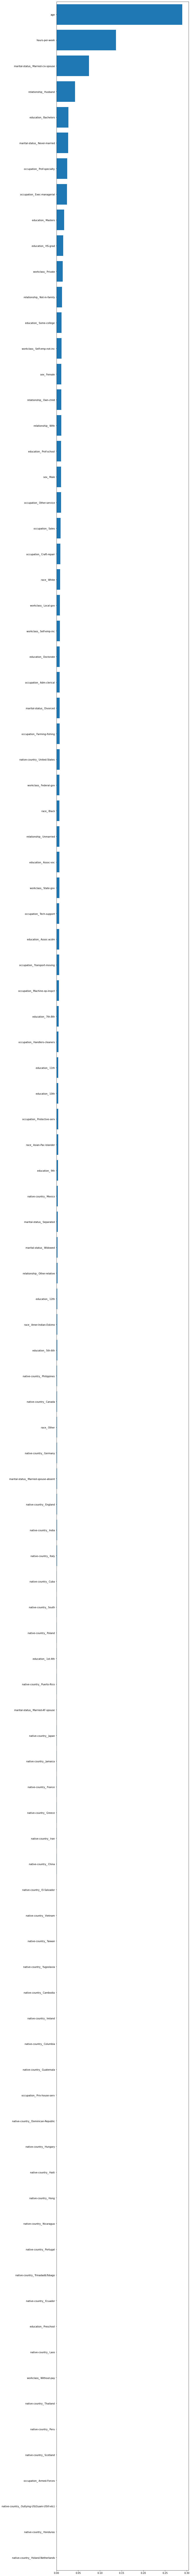

In [21]:
# List the features sorted in descending order by feature importance
from matplotlib import pyplot as plt
feature_importances = rf_model.feature_importances_
features = sorted(zip(X.columns, rf_model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]
fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()